In [2]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

import torchvision.models.detection
import torch
from torchvision import transforms as T
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Pre-trained model RetinaNet

In [3]:
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)

/Users/annushka/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## Import pics


In [12]:
img3 = Image.open('img/bear.jpg')
img4 = Image.open('img/zebra.jpg')

## Check pre-trained model

In [4]:
def get_prediction(img, threshold):
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class

In [9]:
def show_boxes(image, boxes, classes):
    fig, ax = plt.subplots()
    ax.imshow(image)
    x1 = boxes[0][0][0]
    y1 = boxes[0][0][1]
    length = boxes[0][1][0] - x1
    height = boxes[0][1][1] - y1
    rect = patches.Rectangle((x1, y1), length, height, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    plt.show()
    print('Predicted class:', classes[0])

In [13]:
boxes_img3, class_img3 = get_prediction(img3, 0.9)

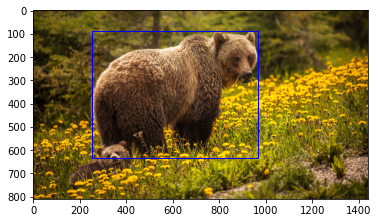

Predicted class: bear


In [14]:
show_boxes(img3, boxes_img3, class_img3)

In [15]:
boxes_img4, class_img4 = get_prediction(img4, 0.9)

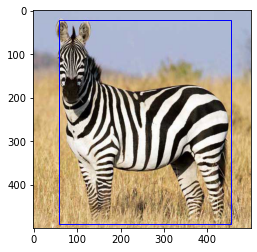

Predicted class: zebra


In [16]:
show_boxes(img4, boxes_img4, class_img4)